<a href="https://colab.research.google.com/github/NSmonish/CN_ReasearchParper/blob/main/CN_SleepHRData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart_rate.csv to heart_rate.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from tensorflow import keras
from tensorflow.keras import layers

,Start Time,End Time,Category,Timestamp,Heart Rate,Source Name
0,2022-09-13 01:47:49,2022-09-13 01:59:19,Light/Core,2022-09-13 01:46:47,64.0000,Apple Watch SE 2020
1,2022-09-13 01:59:19,2022-09-13 02:04:49,Deep,2022-09-13 01:59:47,62.0000,Apple Watch SE 2020
2,2022-09-13 02:04:49,2022-09-13 02:12:49,Light/Core,2022-09-13 02:05:44,64.0000,Apple Watch SE 2020
3,2022-09-13 02:12:49,2022-09-13 02:27:19,Deep,2022-09-13 02:13:49,65.0000,Apple Watch SE 2020
4,2022-09-13 02:27:19,2022-09-13 02:35:49,Light/Core,2022-09-13 02:24:49,64.0000,Apple Watch SE 2020
...,...,...,...,...,...,...
8370,2023-05-14 07:20:36,2023-05-14 07:42:06,REM,2023-05-14 07:23:59,59.0000,Apple Watch Ultra
8371,2023-05-14 07:42:06,2023-05-14 07:43:06,Awake,2023-05-14 07:42:23,58.0000,Apple Watch Ultra
8372,2023-05-14 07:43:06,2023-05-14 07:45:36,Light/Core,2023-05-14 07:42:23,58.0000,Apple Watch Ultra
8373,2023-05-14 07:45:36,2023-05-14 07:52:06,REM,2023-05-14 07:45:24,62.4062,Apple Watch Ultra


In [ ]:
data = pd.read_csv("heart_rate.csv")
df = pd.DataFrame(data)
df

In [4]:
# Data Processing

df['Heart Rate'] = df['Heart Rate'].astype(int)
df['outcome'] = df.apply(lambda row: 1 if (
    ((row['Category']== 'Light/Core' or row['Category']== 'Awake') and (row['Heart Rate'] >=60 and row['Heart Rate'] <=100)) or
    ((row['Category']== 'Deep' or row['Category']== 'REM') and (row['Heart Rate'] >=40 and row['Heart Rate'] <=80))
) else 0, axis=1)

df

,Start Time,End Time,Category,Timestamp,Heart Rate,Source Name
0,2022-09-13 01:47:49,2022-09-13 01:59:19,Light/Core,2022-09-13 01:46:47,64,Apple Watch SE 2020
1,2022-09-13 01:59:19,2022-09-13 02:04:49,Deep,2022-09-13 01:59:47,62,Apple Watch SE 2020
2,2022-09-13 02:04:49,2022-09-13 02:12:49,Light/Core,2022-09-13 02:05:44,64,Apple Watch SE 2020
3,2022-09-13 02:12:49,2022-09-13 02:27:19,Deep,2022-09-13 02:13:49,65,Apple Watch SE 2020
4,2022-09-13 02:27:19,2022-09-13 02:35:49,Light/Core,2022-09-13 02:24:49,64,Apple Watch SE 2020
...,...,...,...,...,...,...
8370,2023-05-14 07:20:36,2023-05-14 07:42:06,REM,2023-05-14 07:23:59,59,Apple Watch Ultra
8371,2023-05-14 07:42:06,2023-05-14 07:43:06,Awake,2023-05-14 07:42:23,58,Apple Watch Ultra
8372,2023-05-14 07:43:06,2023-05-14 07:45:36,Light/Core,2023-05-14 07:42:23,58,Apple Watch Ultra
8373,2023-05-14 07:45:36,2023-05-14 07:52:06,REM,2023-05-14 07:45:24,62,Apple Watch Ultra


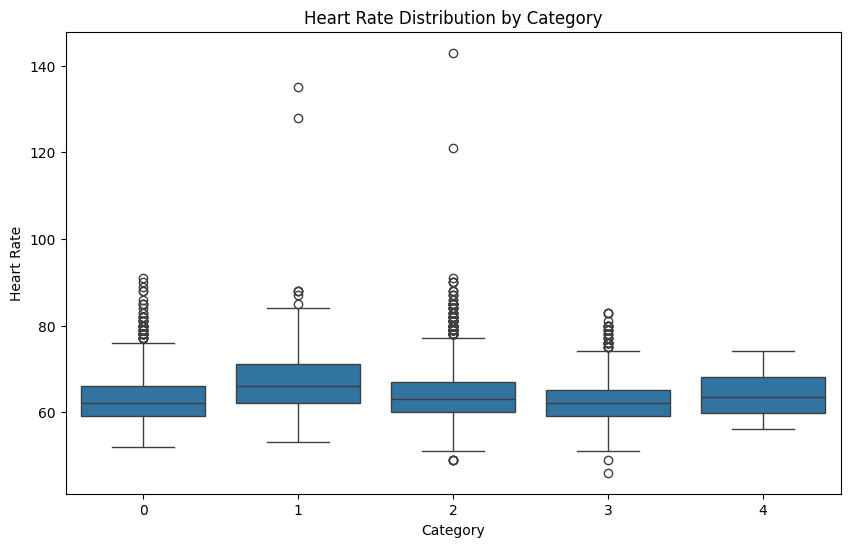

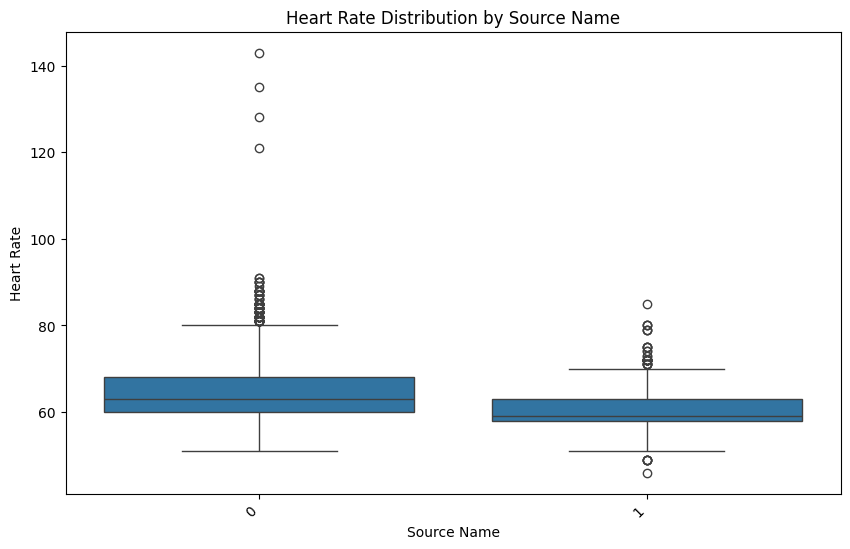

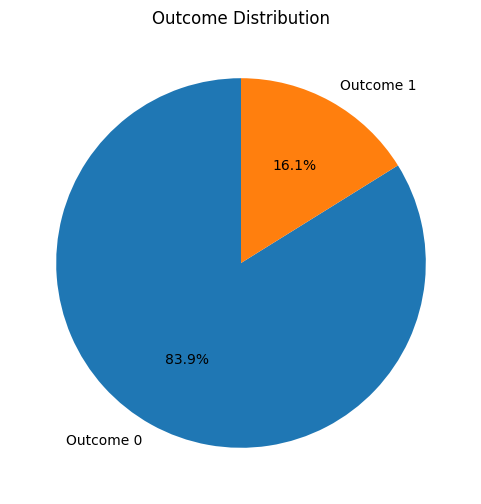

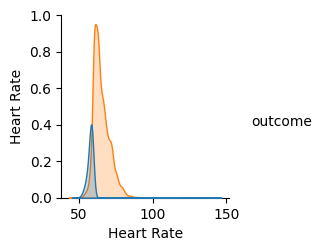

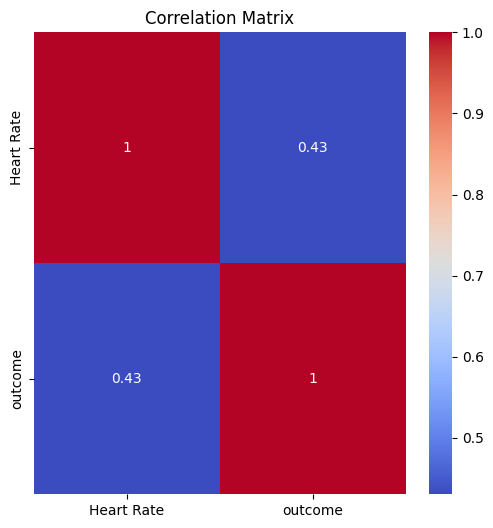

In [16]:
# Data visualisation

# Heart Rate Distribution by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Heart Rate', data=df)
plt.title('Heart Rate Distribution by Category')
plt.show()

# Heart Rate Distribution by Source Name
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source Name', y='Heart Rate', data=df)
plt.title('Heart Rate Distribution by Source Name')
plt.xticks(rotation=45, ha='right')
plt.show()

# Outcome Distribution
outcome_counts = df['outcome'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=['Outcome 0', 'Outcome 1'], autopct='%1.1f%%', startangle=90)
plt.title('Outcome Distribution')
plt.show()

# Pairplot for selected columns
sns.pairplot(df[['Heart Rate', 'outcome']], hue='outcome')
plt.show()

# Correlation Matrix
correlation_matrix = df[['Heart Rate', 'outcome']].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


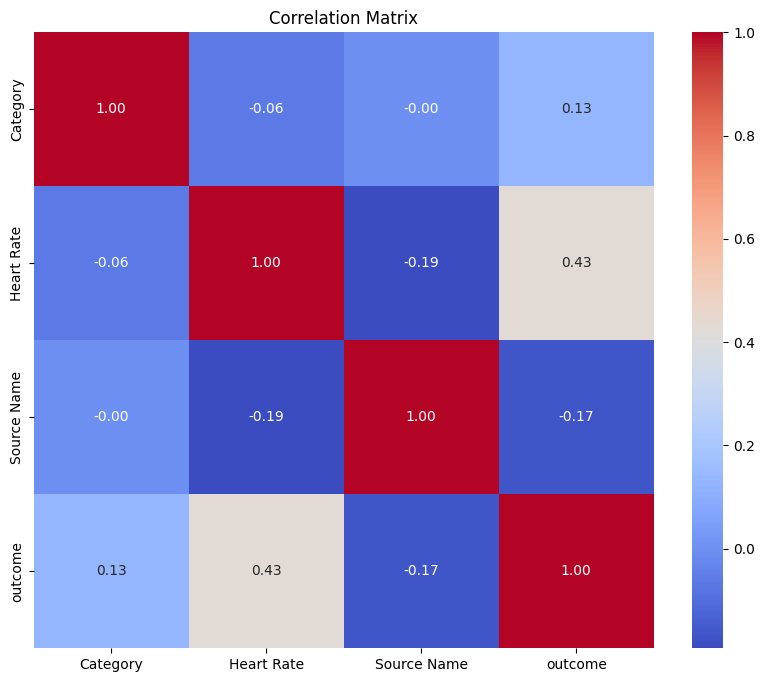

In [13]:
# Correlation Matrix
correlation_df = df[['Category', 'Heart Rate', 'Source Name', 'outcome']]
correlation_matrix = correlation_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [10]:
# Implement Support Vector Machine model
le_category = LabelEncoder()
df['Category'] = le_category.fit_transform(df['Category'])

le_source_name = LabelEncoder()
df['Source Name'] = le_source_name.fit_transform(df['Source Name'])

# Define features (X) and target (y)
X = df[['Category', 'Source Name', 'Heart Rate']]
y = df['outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# SVM Decision Boundary Plot
fig, ax = plt.subplots(figsize=(8, 6))
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)
svm_model_reduced = SVC(kernel='linear', C=1)
svm_model_reduced.fit(X_train_reduced, y_train)
DecisionBoundaryDisplay.from_estimator(
    svm_model_reduced,
    X_train_reduced,
    response_method="predict",
    cmap=plt.cm.Paired,
    ax=ax,
    xlabel="Principal Component 1",
    ylabel="Principal Component 2",
)
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors="k")
plt.title("SVM Decision Boundary")
plt.show()

# Calculate SHAP values for the test set
explainer = shap.KernelExplainer(svm_model.predict, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.63      0.69       282
           1       0.93      0.96      0.94      1393

    accuracy                           0.90      1675
   macro avg       0.85      0.79      0.82      1675
weighted avg       0.90      0.90      0.90      1675

Accuracy: 0.9044776119402985


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       282
           1       1.00      1.00      1.00      1393

    accuracy                           1.00      1675
   macro avg       0.99      0.99      0.99      1675
weighted avg       1.00      1.00      1.00      1675

Accuracy: 0.9958208955223881


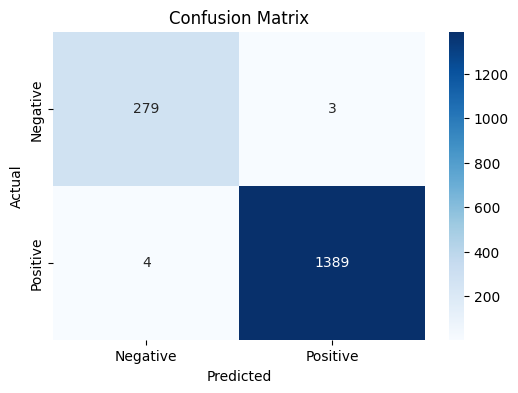

In [25]:
# Implement K-Nearest Neighbours model
X = df[['Category', 'Source Name', 'Heart Rate']]
y = df['outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# KNN distance plot
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(X_train)
distances, indices = neigh.kneighbors(X_train)
plt.figure(figsize=(8, 6))
plt.plot(distances[:, 1])
plt.xlabel("Data Points")
plt.ylabel("Distance to Nearest Neighbor")
plt.title("K-NN Distance Plot")
plt.show()

# Plot the SHAP values
explainer = shap.KernelExplainer(knn_model.predict, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       1.00      1.00      1.00      1393

    accuracy                           1.00      1675
   macro avg       1.00      1.00      1.00      1675
weighted avg       1.00      1.00      1.00      1675

Accuracy: 1.0


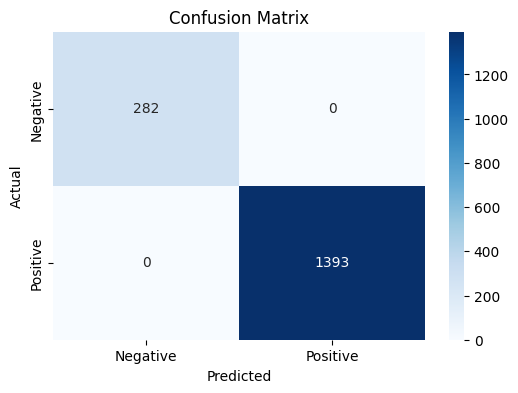

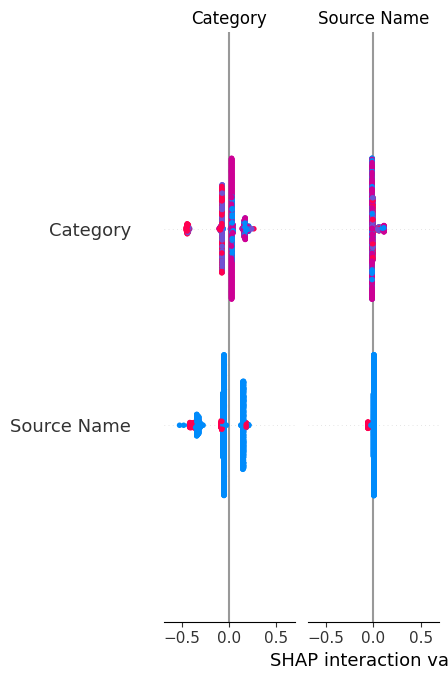

In [32]:
# Implement random forest model
X = df[['Category', 'Source Name', 'Heart Rate']]
y = df['outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the decision tree
tree = rf_model.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree,
          feature_names=X.columns,
          class_names=['Menatlly Stressed', 'Mentally Healthy'],
          filled=True,
          rounded=True)
plt.show()

# Plot the SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       1.00      1.00      1.00      1393

    accuracy                           1.00      1675
   macro avg       1.00      1.00      1.00      1675
weighted avg       1.00      1.00      1.00      1675

Accuracy: 1.0


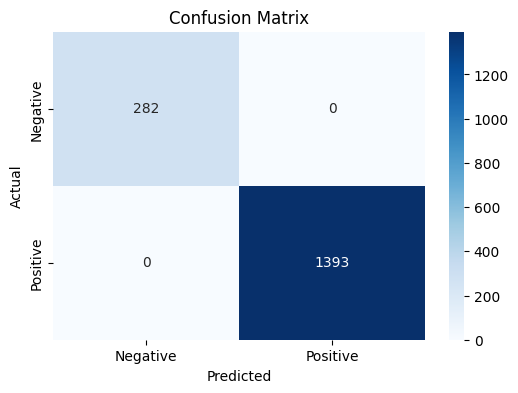

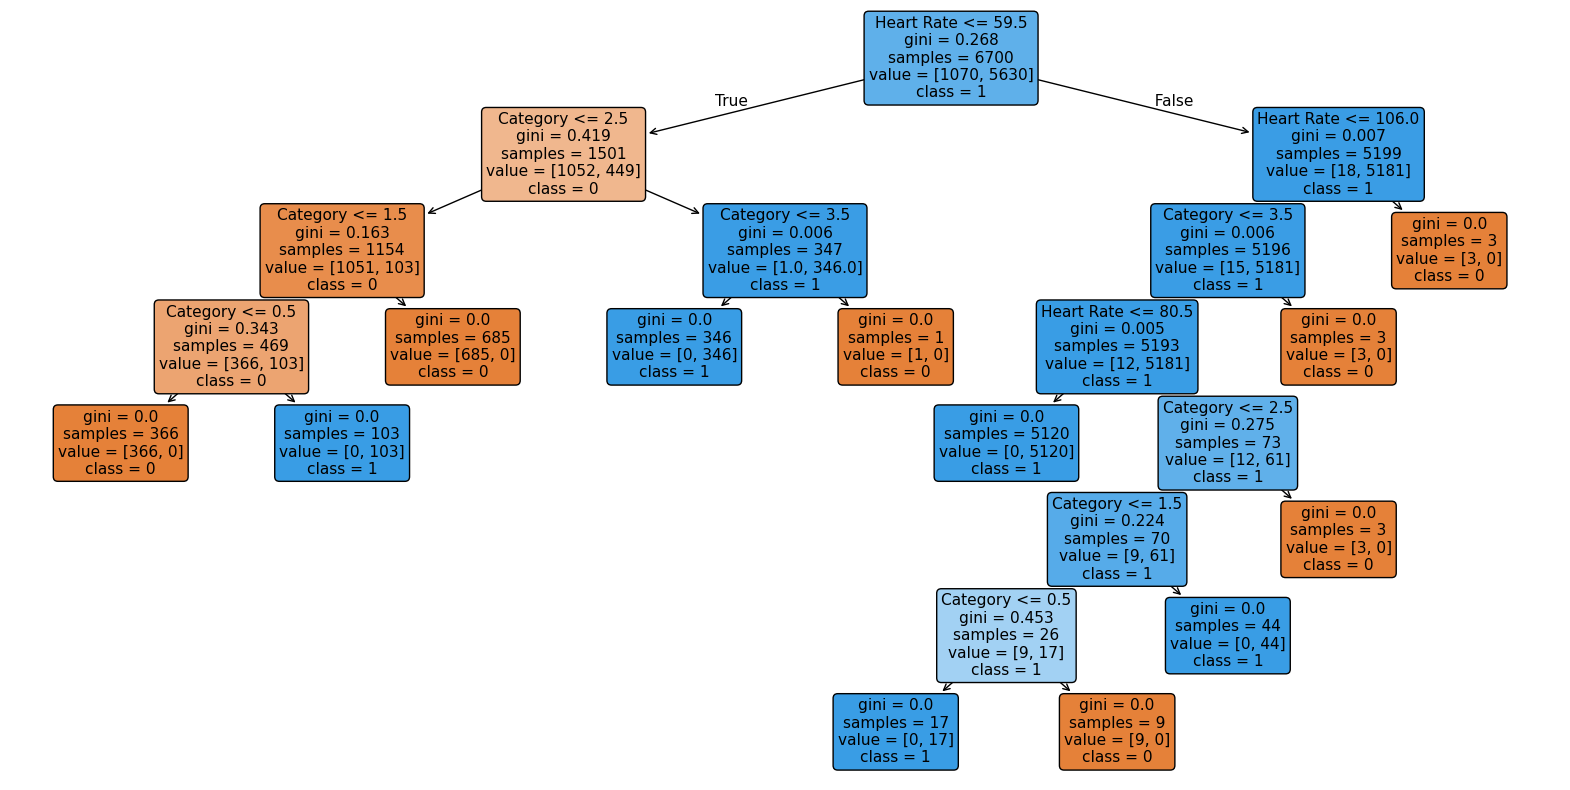

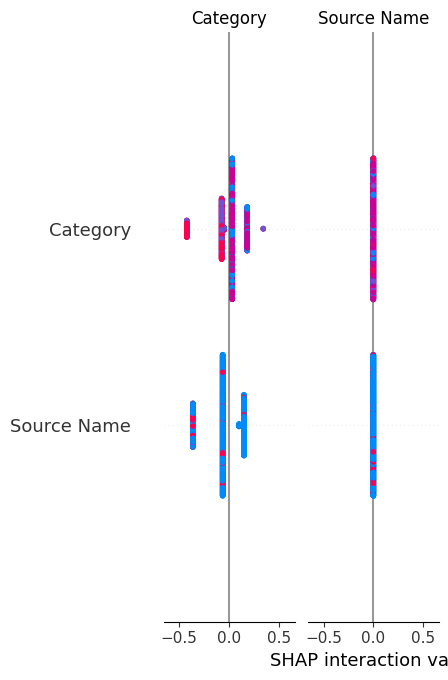

In [34]:
# Implement decision tree model
X = df[['Category', 'Source Name', 'Heart Rate']]
y = df['outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['Mentally Stressed', 'Mentally Healthy'],
          filled=True,
          rounded=True)
plt.show()

#Plot the SHAP values
explainer = shap.TreeExplainer(dt_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       1.00      1.00      1.00      1393

    accuracy                           1.00      1675
   macro avg       1.00      1.00      1.00      1675
weighted avg       1.00      1.00      1.00      1675

Accuracy: 1.0


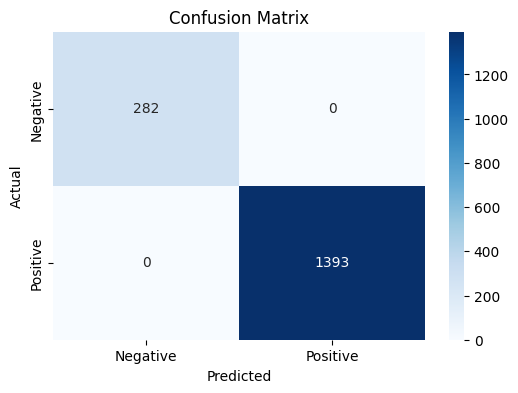

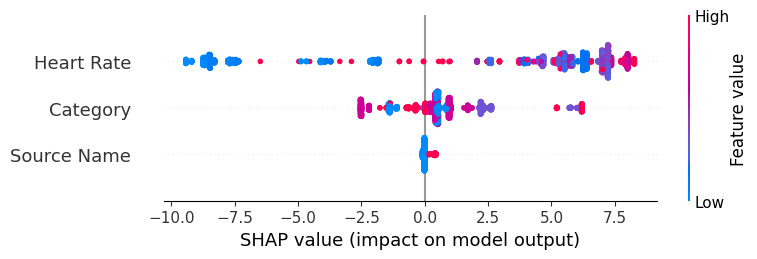

In [35]:
# Implement xgboost model
X = df[['Category', 'Source Name', 'Heart Rate']]
y = df['outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.57      0.68       282
           1       0.92      0.98      0.95      1393

    accuracy                           0.91      1675
   macro avg       0.88      0.78      0.81      1675
weighted avg       0.91      0.91      0.90      1675

Accuracy: 0.9098507462686567


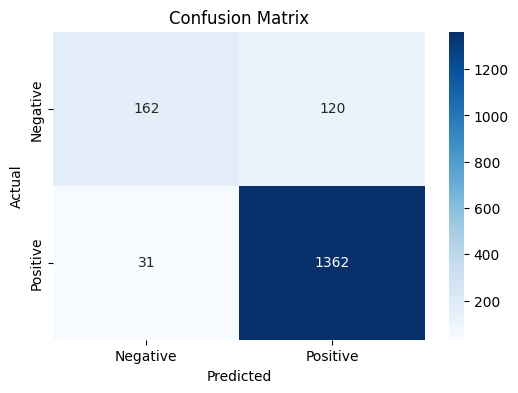

In [36]:
# Implement logistic regression along with shap
X = df[['Category', 'Source Name', 'Heart Rate']]
y = df['outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the S-curve
coefficients = logistic_model.coef_[0]
intercept = logistic_model.intercept_[0]
x_values = np.linspace(X_train.min().min(), X_train.max().max(), 100)
z = np.dot(x_values.reshape(-1, 1), coefficients.reshape(1, -1)) + intercept
y_probabilities = 1 / (1 + np.exp(-z))
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_probabilities, label='Logistic Regression')
plt.xlabel('Predictor Variable')
plt.ylabel('Probability of Positive Outcome')
plt.title('Logistic Regression S-Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot the SHAP values
explainer = shap.LinearExplainer(logistic_model, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       282
           1       1.00      0.99      0.99      1393

    accuracy                           0.99      1675
   macro avg       0.98      0.99      0.98      1675
weighted avg       0.99      0.99      0.99      1675

Accuracy: 0.9898507462686568


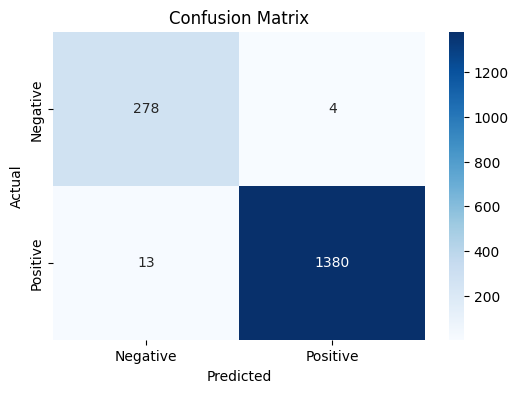

  0%|          | 0/1675 [00:00<?, ?it/s]

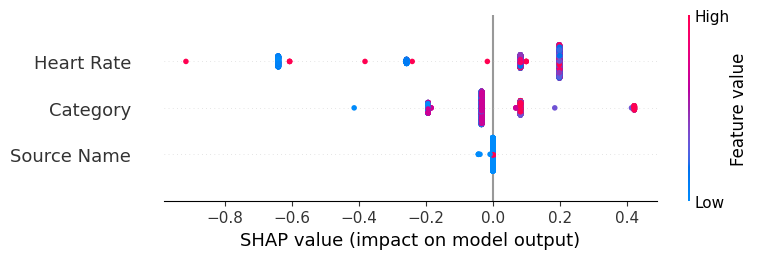

In [41]:
# Implement Adaboost
X = df[['Category', 'Source Name', 'Heart Rate']]
y = df['outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the SHAP values
explainer = shap.KernelExplainer(ada_model.predict, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8095 - loss: 0.6039 - val_accuracy: 0.8291 - val_loss: 0.4260
Epoch 2/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.4016 - val_accuracy: 0.8291 - val_loss: 0.4197
Epoch 3/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8486 - loss: 0.3950 - val_accuracy: 0.8291 - val_loss: 0.4321
Epoch 4/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8443 - loss: 0.4014 - val_accuracy: 0.8291 - val_loss: 0.4305
Epoch 5/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8455 - loss: 0.3929 - val_accuracy: 0.8291 - val_loss: 0.4118
Epoch 6/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8417 - loss: 0.3949 - val_accuracy: 0.8291 - val_loss: 0.4101
Epoch 7/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8472 - loss: 0.3860 - val_accuracy: 0.8291 - val_loss: 0.4060
Epoch 8/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8469 - loss: 0.3828 - val_accuracy: 0.8269 - val_

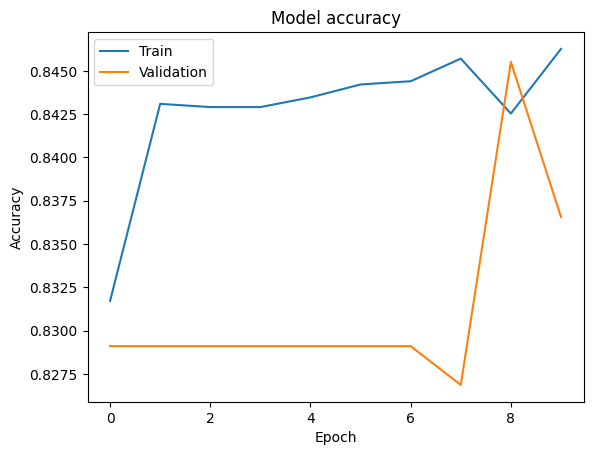

In [43]:
# Implement sequential model from Keras
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)  # Adjust epochs and batch size as needed

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
